In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys

In [5]:
# Example usage
uid = "208"
slice_num = "112"
root_path = "/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_GAN_2class_csf"
image_path = f"{root_path}/images/train/sub-{uid}_slice_{slice_num}.png"
label_path = f"{root_path}/labels/train/sub-{uid}_slice_{slice_num}.txt"

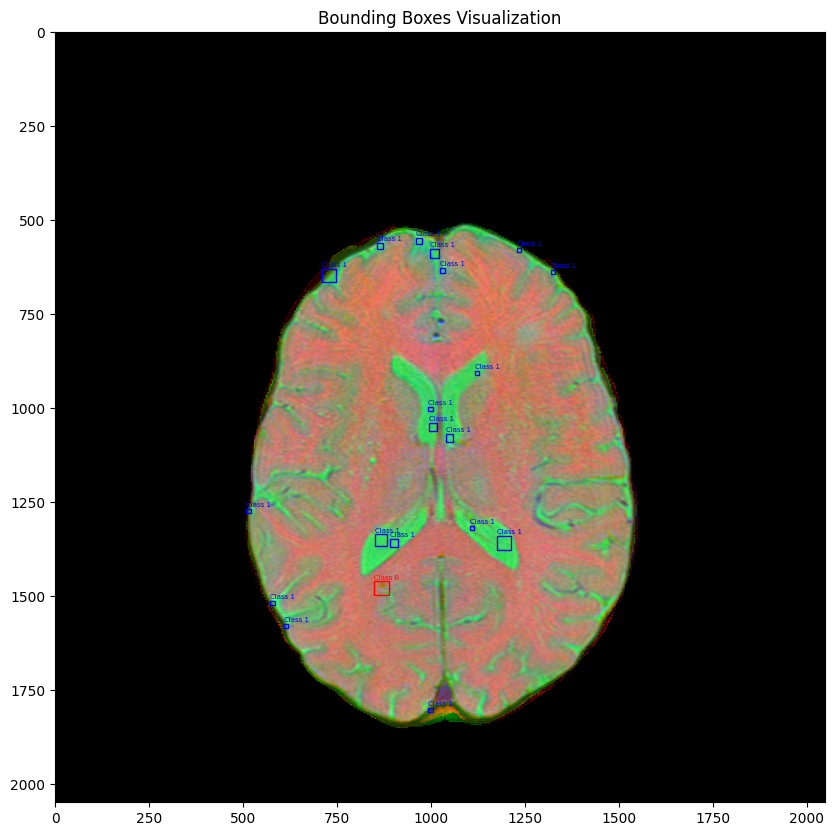

In [6]:
def visualize_bounding_boxes(image_path, label_path):
    image = Image.open(image_path)
    image = np.array(image)
    height, width = image.shape[:2]

    # Load the labels
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Parse the labels
    bboxes = []
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.split())
        x_center *= width
        y_center *= height
        box_width *= width
        box_height *= height
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)
        bboxes.append((class_id, x_min, y_min, x_max, y_max))

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.axis('on')

    # Plot the bounding boxes
    for bbox in bboxes:
        class_id, x_min, y_min, x_max, y_max = bbox
        color = 'red' if class_id == 0 else 'blue'
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                              linewidth=1, edgecolor=color, facecolor='none')
        plt.gca().add_patch(rect)
        # plt.text(x_min, y_min - 5, f'Class {int(class_id)}', color=color, fontsize=5, weight='bold')
        plt.text(x_min, y_min - 5, f'Class {int(class_id)}', color=color, fontsize=5)

    plt.title("Bounding Boxes Visualization")
    plt.show()

visualize_bounding_boxes(image_path, label_path)

(2048, 2048, 3)


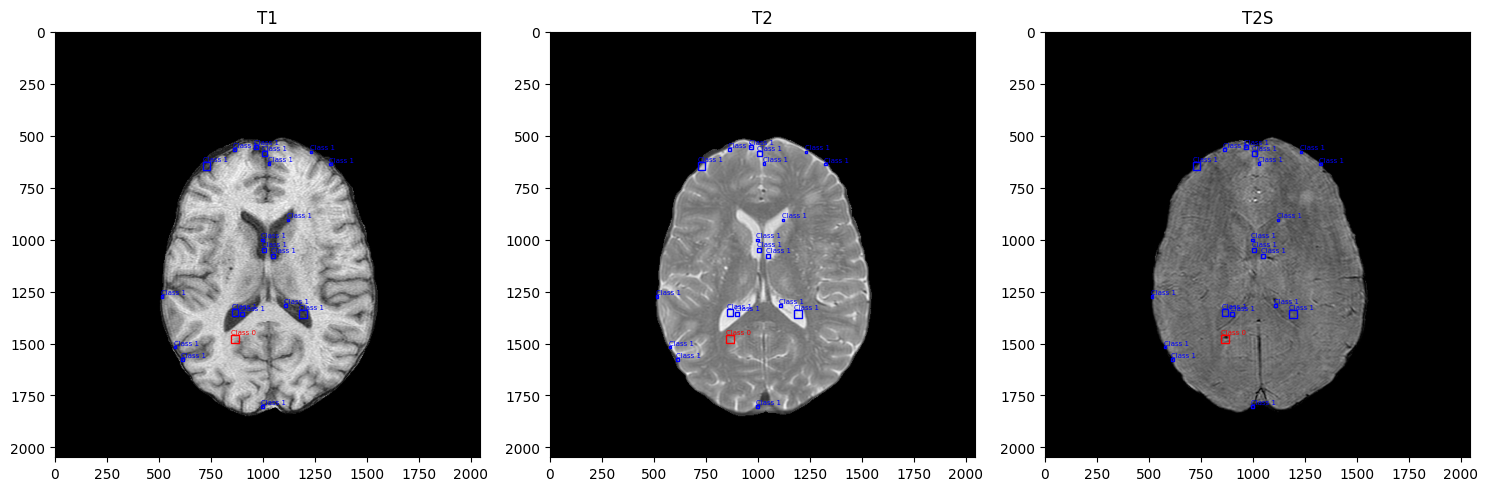

In [7]:
def visualize_bounding_boxes(image_path, label_path):
    image = Image.open(image_path)
    image = np.array(image)
    print(image.shape)
    height, width = image.shape[:2]

    # Load the labels
    with open(label_path, 'r') as f:
        labels = f.readlines()

    # Parse the labels
    bboxes = []
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.split())
        x_center *= width
        y_center *= height
        box_width *= width
        box_height *= height
        x_min = int(x_center - box_width / 2)
        y_min = int(y_center - box_height / 2)
        x_max = int(x_center + box_width / 2)
        y_max = int(y_center + box_height / 2)
        bboxes.append((class_id, x_min, y_min, x_max, y_max))


    channels_names = ['T1', 'T2', 'T2S']
    plt.figure(figsize=(15, 5))
    
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(image[:,:,i], cmap='gray')
        plt.axis('on')
        plt.title(channels_names[i])

        # Plot the bounding boxes
        for bbox in bboxes:
            class_id, x_min, y_min, x_max, y_max = bbox
            color = 'red' if class_id == 0 else 'blue'
            rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                linewidth=1, edgecolor=color, facecolor='none')
            plt.gca().add_patch(rect)
            plt.text(x_min, y_min - 5, f'Class {int(class_id)}', color=color, fontsize=5)

    plt.tight_layout()
    plt.show()

# Example usage
uid = "233"
slice_num = "042"
# image_path = f"/mnt/storage/ji/brain_mri_valdo_mayo/valdo_resample_ALFA_YOLO_PNG_epd_gt_box_GAN_cmbOnly/images/train/sub-{uid}_slice_{slice_num}.png"
# label_path = f"/mnt/storage/ji/brain_mri_valdo_mayo/TEMP3_train/labels/train/sub-{uid}_slice_{slice_num}.txt"
# image_path = f"{root_path}/images/train/sub-{uid}_slice_{slice_num}.png"
# label_path = f"{root_path}/labels/train/sub-{uid}_slice_{slice_num}.txt"
visualize_bounding_boxes(image_path, label_path)

In [8]:
img_copy = img.copy()
img_copy[ img_copy == 0] = 255
plt.imshow(img_copy, cmap='gray')

NameError: name 'img' is not defined